In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['ggplot', 'assets/class.mplstyle'])

red = '#E24A33'
blue = '#348ABD'
purple = '#988ED5'
gray = '#777777'
yellow = '#FBC15E'
green = '#8EBA42'
pink = '#FFB5B8'

# AS4501

# Regression

# Bibliography: Chapter 8 Ivezic+

# Regression:

- Finding the relation between a dependent variable $y$ and a set of independent variables $\bf x$. It describes the expectation value of $y$ given $\bf x$, $E[y|{\bf x}]$.

- The dependent variable $y$ is also called **response variable**.

- The problem is to find the expectation of $y$ given $\bf x$:

$E[y|{\bf x}] = f({\bf x}, \theta) + \epsilon$

where $\epsilon$ is a random error.

- Note that we estimate $E[y | {\bf x}]$, the conditional expectation of $y$ given $\bf x$, rather than $p(y, {\bf x})$, the joint distribution of $y$ and $\bf x$, which is a much harder problem to solve. Regression is a simpler problem: instead of determining the multidimensional pdf, we would like to infer the expectation of $y$ given $\bf x$.

- **The goal of regression usually focuses on estimation of the parameters $\theta$ of the function and their confidence intervals.**

## Metrics:

## Mean squared error (MSE)

The mean squared error (MSE) or mean squared deviation (MSD) of an estimator measures the average of the squares of the errors:

It is defined by (estimation of $y$):

## $MSE \equiv \frac{1}{n} \sum_i (y_i - \hat{y}_i)^2$

## Coefficient of determination (R$^2$)

It is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

It is defined as:

## $R^2 \equiv 1  - \frac{SS_{res}}{SS_{tot}}$,

where

### $ SS_{res} = \sum_i (y_i - \hat{y}_i)^2$ 

and

### $ SS_{tot} = \sum_i (y_i - \bar{y})^2$

## Variance and bias

The variance of an estimator of the parameter $\theta$ will be:

## $Var_{\hat{\theta}} = E_{\hat{\theta}}\biggl[ \bigl(\hat{\theta} - E_{\hat{\theta}}[\hat{\theta}]\bigr)^2\biggr]$

The bias of an estimator will be: 

## $Bias_{\hat{\theta}} = E_{\hat{\theta}} - \theta$

![](images/05-BiasVariance.jpeg)

## Relation between MSE, variance and bias

Note that when estimating a parameter the MSE equals the variance plus the bias squared

![](images/05-MSE.svg)

# Linear regression

The one dimensional linear regression model is defined by

$f(x, \theta) = \theta_0 + \theta_1 x$

## Least squares regression for linear regression

## Ordinary least squares

Minimizes the residual sum of squares (RSS) between the observed response values $y_i$ and the model predictions

### $\min RSS = \min \sum\limits_{i=1}^{n} (y_i - \theta_0 - \theta_1 x_i)^2$

Differentiating w.r.t. to $\theta_0$ and $\theta_1$ and setting these derivatives to zero gives two equations which can be solved to give:



## $\hat{\theta}_{1, OLS} = \frac{\sum\limits_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})}{\sum\limits_{i=1}^n (x_i - \bar{x})^2} = \frac{S_{xy}}{S_{xx}}$

## $\hat{\theta}_{0, OLS} = \bar{y} - \hat{\theta}_{1,OLS} ~\bar{x}$

These estimators are also the maximum likelihood estimator (MLE) when the errors are normally distributed.

The OLS estimator of the error variance $\sigma^2$ is:

## $\hat{\sigma}^2 = S^2 = \frac{RSS}{n - 2}$

If the errors are i.i.d. random variables, the slope and intercept are unbiased and asymptotically normally distributed:

## $\hat{\theta}_{1, OLS} \sim N\biggl(\theta_1, \frac{\sigma^2}{S_{XX}}\biggr)$

## $\hat{\theta}_{0, OLS} \sim N\biggl(\theta_0, \sigma^2 \biggl(\frac{1}{n} + \frac{\bar{x}^2}{S_{XX}}\biggr)\biggr)$

If the errors are also normally distributed with zero mean and known variance $\sigma^2$, then the variance is $\chi^2$ distributed:


## $\hat{\sigma}^2 \sim \biggl(\frac{\sigma^2}{n - 2} \biggr) \chi_{n-2}^{2}$

However, $\sigma^2$ is rarely known, and only the sample variance $S^2$ is known, changing the statistical properties of the estimators.

Defining:

## $ T = \frac{\hat{\theta_1} - \theta_1}{SE}$

where $SE = \frac{S}{\sqrt{S_{XX}}}$ is also known as the **standard error**,

one can show that $T$ is t distributed with $n-2$ degrees of freedom.

Then, the $(1-\alpha)$ confidence interval for $\theta_1$ becomes $(\hat{\theta}_1 - t_{\alpha/2, n-2} ~ SE, \hat{\theta}_1 + t_{\alpha/2, n-2} ~ SE)$ and the confidence interval for $y$ at a given $x$ becomes:

## $y(x) = \hat{\theta}_0 + \hat{\theta}_1 x \pm t_{\alpha/2, n - 2} ~ S ~ \sqrt{1 + \frac{1}{n} \frac{(x - \bar{x})^2}{S_{xx}}}$

### Maximum likelihood estimator (MLE)

Let us consider the probability of observing $\lbrace y_i \rbrace$ given the parameters $\theta$ and the set of independent variable $\lbrace x_i \rbrace$.

Here we assume that the observations are Gaussian with standard deviation $\sigma_i$:

## $p(\lbrace y_i \rbrace | \lbrace x_i \rbrace, \theta) = \prod\limits_{i = 1}^{N} \frac{1}{\sqrt{2 \pi} \sigma_i} \exp \biggl( \frac{- (y_i - (\theta_0 + \theta_1 x_i))^2}{2 \sigma_i^2} \biggr)$

Thus, we can maximize the log likelihood minus a constant to find the **maximum likelihood estimator (MLE)**

## $\log(L) = \log p(\lbrace y_i \rbrace | \lbrace x_i \rbrace, \theta) = \sum\limits_{i = 1}^{N}  \bigl( \frac{- (y_i - (\theta_0 + \theta_1 x_i))^2}{2 \sigma_i^2} \bigr)$

which is equivalent to minimizing the RSS

Using Bayes theorem $P(A|B) = P(B|A)~\dfrac{P(A)}{P(B)}$ we can also see that 

## $P(\theta | \lbrace y_i \rbrace, \lbrace x_i \rbrace) = P(\lbrace y_i \rbrace | \lbrace x_i \rbrace, \theta) ~ \frac{p(\theta)}{p(y_i)}$

Therefore, this is also the **maximum a posteriori (MAP)** estimator assuming a flat prior for $\theta$.

## Online estimation

This figure illustrates how the uncertainties in the parameters shrink as the number of observations grow.

![](images/05-OnlineBayesian.png)

### Diabetes dataset example
(https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)



In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [7]:
# Use only one feature (body mass index)
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error (MSE): %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score (coefficient of determination, R2): %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error (MSE): 2548.07
Variance score (coefficient of determination, R2): 0.47


Text(0, 0.5, 'Diabetes disease progression')

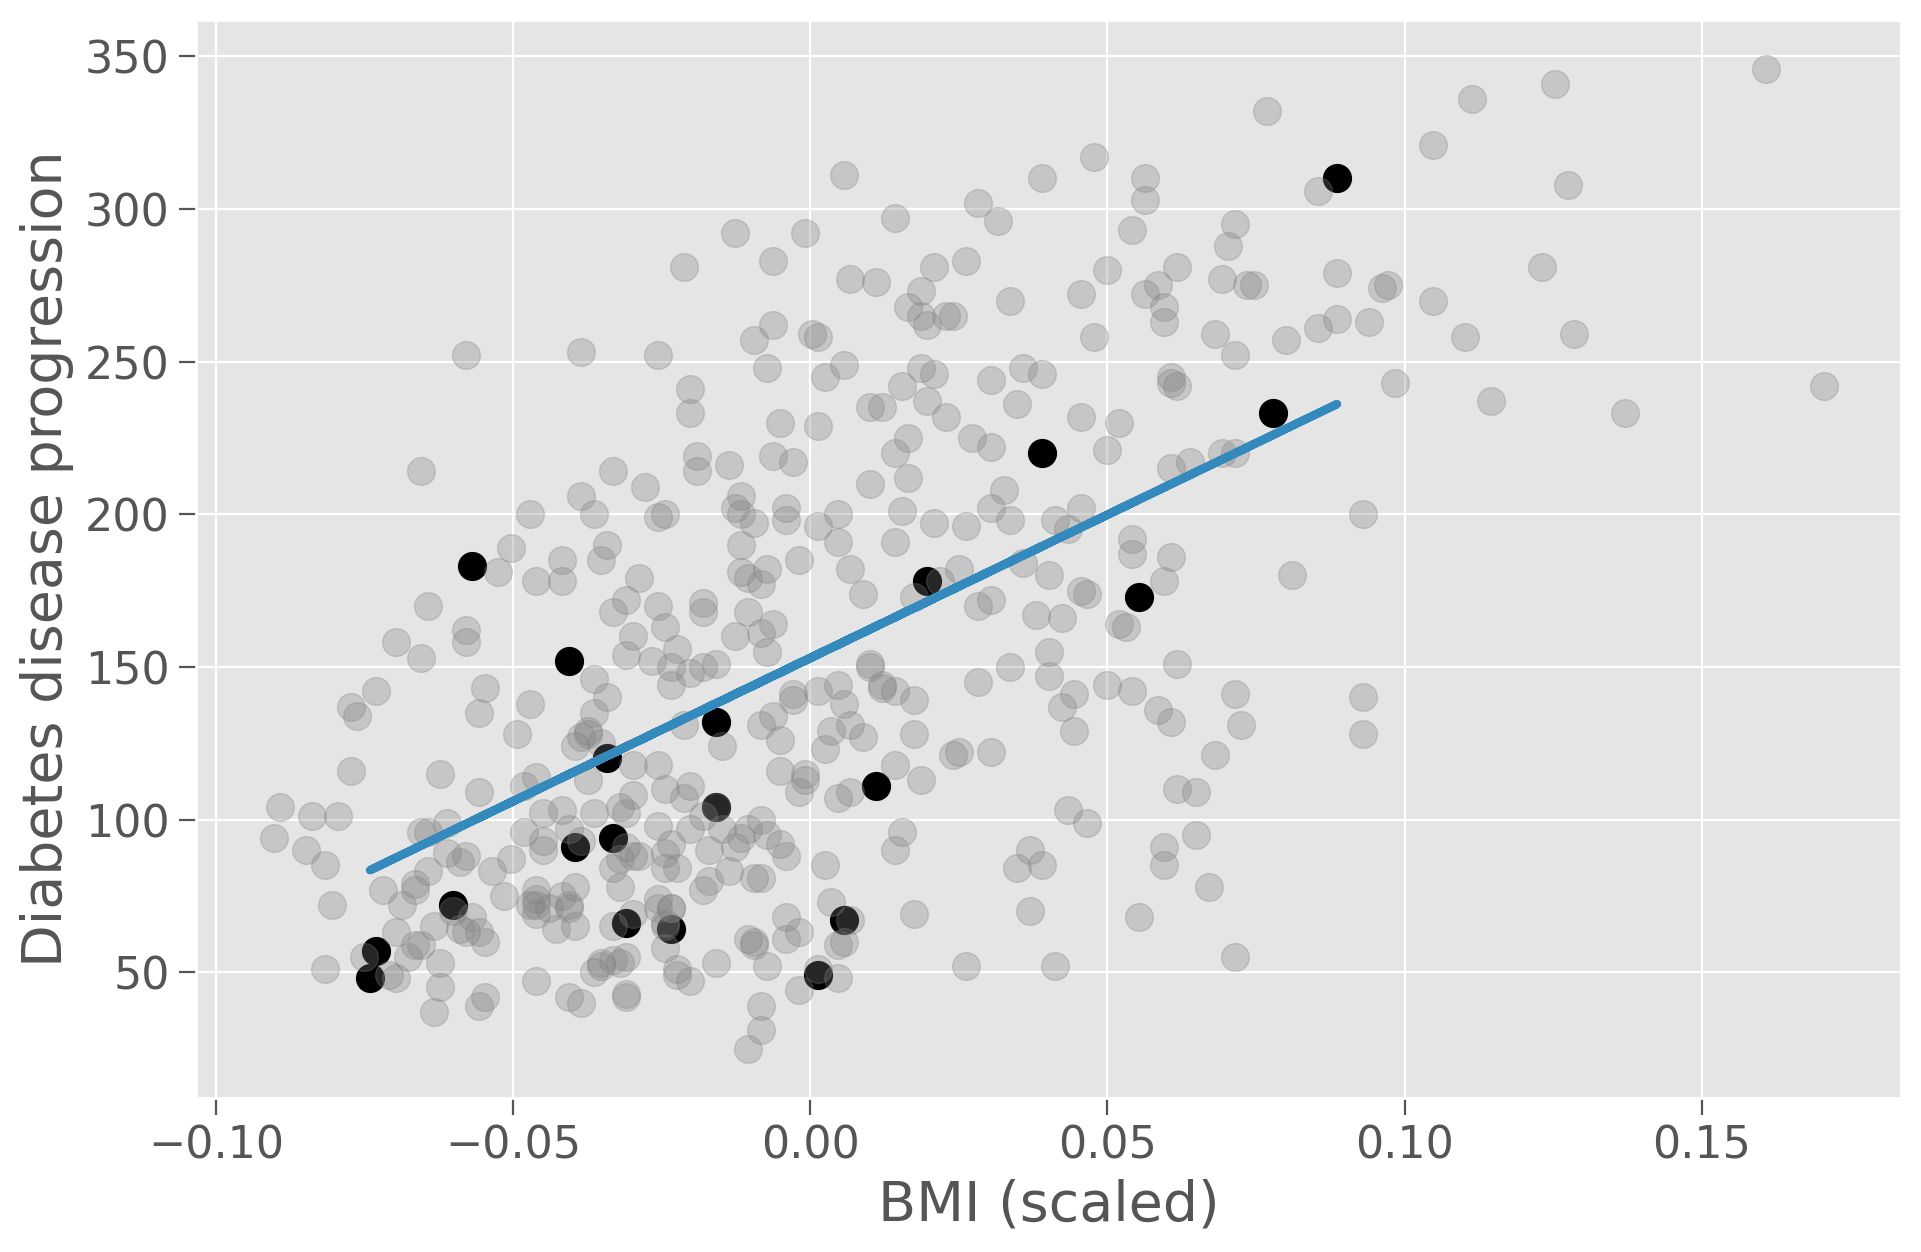

In [8]:
fig, ax = plt.subplots(figsize = (11, 7))

ax.scatter(diabetes_X_test, diabetes_y_test,  c = 'k')
ax.scatter(diabetes_X_train, diabetes_y_train, c = 'gray', alpha = 0.3)
ax.plot(diabetes_X_test, diabetes_y_pred, color=blue, linewidth=3)
ax.set_xlabel("BMI (scaled)")
ax.set_ylabel("Diabetes disease progression")

## Least squares in matrix form

The previous equations can be derived in matrix form

In general one can define regression in terms of a design matrix $M$:

## $y = {\bf M} ~ \theta$

where $y$ is the $N$–dimensional vector of values $y_i$.

## $y = \begin{bmatrix} y_0 \\ y_1 \\ . \\ y_{N-1} \end{bmatrix}$

For straight--line regression, $\theta$ is a two--dimensional vector:

## $\theta = \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix}$

and $M$ is a $2 \times N$ matrix:

## ${\bf M} = \begin{bmatrix} 1 & x_0 \\ 1 & x_1 \\ ... & ... \\ 1 & x_{N-1} \\ \end{bmatrix}$

For the case of heteroscedastic uncertainties, we can define the covariance matrix $C$:

## $ C = \begin{bmatrix} \sigma_0^2 & 0 & . & 0 \\ 0 & \sigma_1^2 & . & 0 \\ . & . & . & . \\ 0 & 0 & . & \sigma_{N - 1}^2\\ \end{bmatrix}$

The MLE solution for this regression is:

## ${\bf \hat{\theta}} = ({\bf M}^T C^{-1} {\bf M})^{-1} ({\bf M}^T C^{-1} {\bf y})$

which is the also the solution that minimizes the equation

## $({\bf y} - {\bf M} ~ \theta)^{-1} C^{-1} ({\bf y} -  {\bf M} ~ \theta)$

The uncertainties on the regression coefficients $\bf \theta$ can be expressed as the following matrix (general case):

## $\Sigma_\theta = \begin{bmatrix} \sigma_{\theta_0}^2 & \dots & \sigma_{\theta_0 \theta_i} & \dots \\ \vdots & \ddots & \vdots & \vdots \\ \sigma_{\theta_0 \theta_i} & \dots & \sigma_{\theta_i}^2 \\  \vdots & \vdots & \vdots & \ddots \\ \end{bmatrix} = [{\bf M}^T C^{-1} {\bf M}]^{-1}$

In the general case, $C$ can be non--diagonal too, which indicates correlated noise.

## Polynomial regression

Let us consider the case where we perform a polynomial representation of the data, e.g.:

## $y_i = \theta_0 + \theta_1 x_i + \theta_2 x_i^2 + \theta_3 x_i^3$

In this case the design matrix $M$ becomes:

## $ M = \begin{bmatrix}
1 & x_0 & x_0^2 & x_0^3 \\
1 & x_1 & x_1^2 & x_1^3 \\
. & . & . & . \\
1 & x_N & x_N^2 & x_N^3 \\
\end{bmatrix}$

And the previous formulae can be used to find the least squares solution since the coefficients are linear

## Regularization

Sometimes we may want to trade an increase in bias for a reduction in variance (e.g. if the matrix $M$ is ill-conditioned the variance could be very large)

## Ridge regression

In this case we include the following regularization term in the least squares equation:

## $({\bf y} - M~ \theta)^{-1} C^{-1}({\bf y} - M~ \theta) + \lambda~ |\theta^T \theta|$

$\lambda$ is called the **regularization or smoothing parameter** and **$|\theta^T \theta|$** is called the **penalty function**

It can be shown that the new solution will be:

## ${\bf \hat{\theta}} = ({\bf M}^T C^{-1} {\bf M} + \lambda I)^{-1} ({\bf M}^T C^{-1} {\bf y})$

It is worth noting that even if $M^T C^{-1} M$ were singular, $M^T C^{-1} M + \lambda I$ may not be singular

### Bayes equivalent

In the Bayesian approach, it can be shown that the MAP solution is the same as the ridge solution if we assume a Gaussian prior for the parameters $\theta$:


## $ p(\theta) \propto \exp \biggl( \frac{- \lambda (\theta^T \theta)}{2} \biggr)$

Ridge regression effectively constrains the norm of the parameters $\theta$:

## $|{\bf \theta}|^2 < s$

## LASSO regression

Another common regularization technique

In this case we include a different regularization term in the least squares equation:

## $({\bf y} - \theta {\bf X})^{-1}({\bf y} - \theta {\bf X}) + \lambda |\theta|$

Now we use the $\ell_1$ norm instead of the $\ell_2$ norm.

In this case there is no closed form, but it can be shown that the MAP solution is the same if an exponential prior for the parameters $\theta$ is assumed.

LASSO regression effectively constrains the $\ell_1$ norm of the parameters $\theta$:

## $|{\bf \theta}| < s$

### Understanding Ridge and LASSO regression

![](images/05-RidgeLasso.png)

# Comparison between ordinary, ridge and LASSO regression

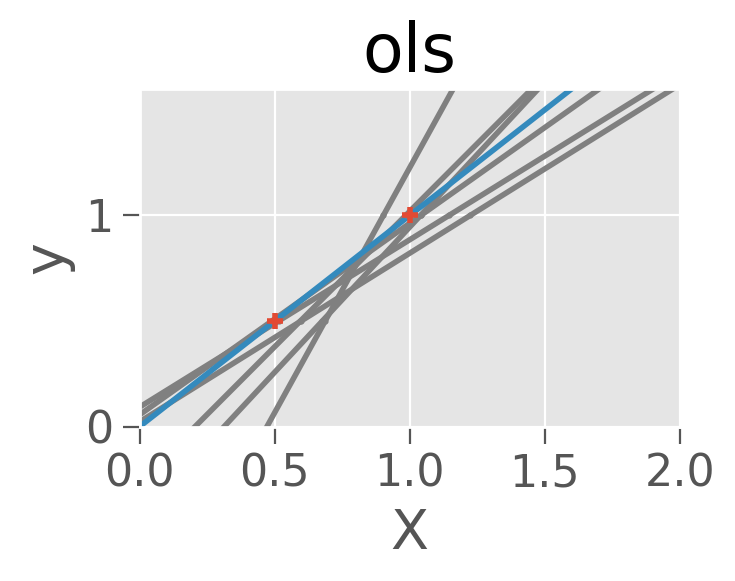

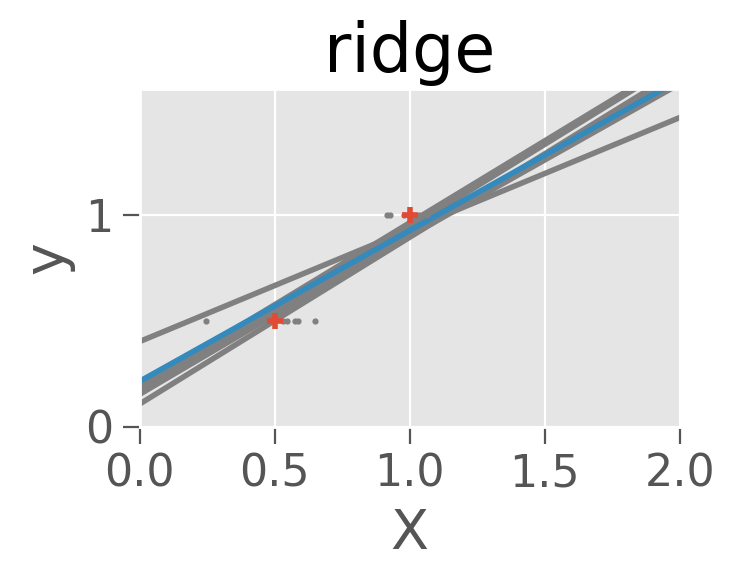

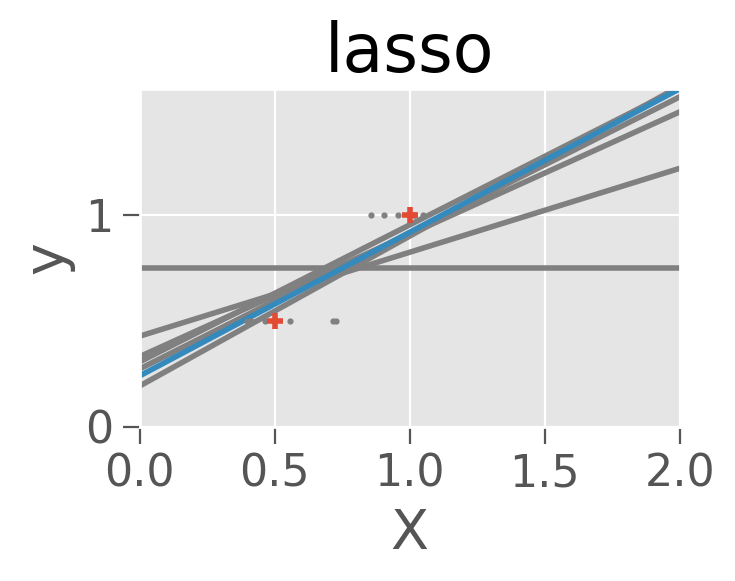

In [9]:
from sklearn import linear_model

X_train = np.c_[.5, 1].T
y_train = [.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(ols=linear_model.LinearRegression(),
                   ridge=linear_model.Ridge(alpha=.05),
                    lasso=linear_model.Lasso(alpha=.02))

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(4, 3))

    for _ in range(6):
        this_X = .1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color='gray')
        ax.scatter(this_X, y_train, s=3, c='gray', marker='o', zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color=blue)
    ax.scatter(X_train, y_train, s=30, c=red, marker='+', zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel('X')
    ax.set_ylabel('y')

    fig.tight_layout()

plt.show()

## Choosing the regularization parameter $\lambda$

One way to choose $\lambda$ is to do k-fold cross-validation on $\lambda$, defining the error:

## $ Err(\lambda) = k^{1} \sum_k N_k^{-1} \sum\limits_{i}^{N_k} \frac{[y_i - f(x_i | \theta)]^2}{\sigma_i^2}$

and then choose the $\lambda$ with the smallest error.

## Outliers

## Huber loss

The Huber estimator minimizes

## $ \sum\limits_{i=1}^N e(y_i|y)$

where $e(y_i|y)$ is modeled as:

## $\begin{equation}
  \phi(t)=\left\{
  \begin{array}{@{}ll@{}}
    \frac{1}{2} t^2, & \text{if}\ |t|\le c \\
    c|t| - \frac{1}{2} c^2, & \text{otherwise}
  \end{array}\right.
\end{equation}$

With $t = y_i - \hat{y}_i$

![](images/05-Huberloss.png)

![](images/05-HUber.png)

## Bayesian Outlier Methods

Alternative to the Huber loss, we can modify the likelihood function by assuming a mixture model, where some points belong to an outlier distribution, which is modeled as a Gaussian with mean $\mu_b$ and variance $V_b$, and others belong to the main population, which follow the linear model.

1. Assume that the probability of belonging to the outlier population is $p_b$

![](images/05-BayesianOutlier1.png)

2. Assume that each point can be tagged as either outlier ($g_i = 0$) or not ($g_i = 1$)

![](images/05-BayesianOutlier2.png)

![](images/05-Outliers.png)

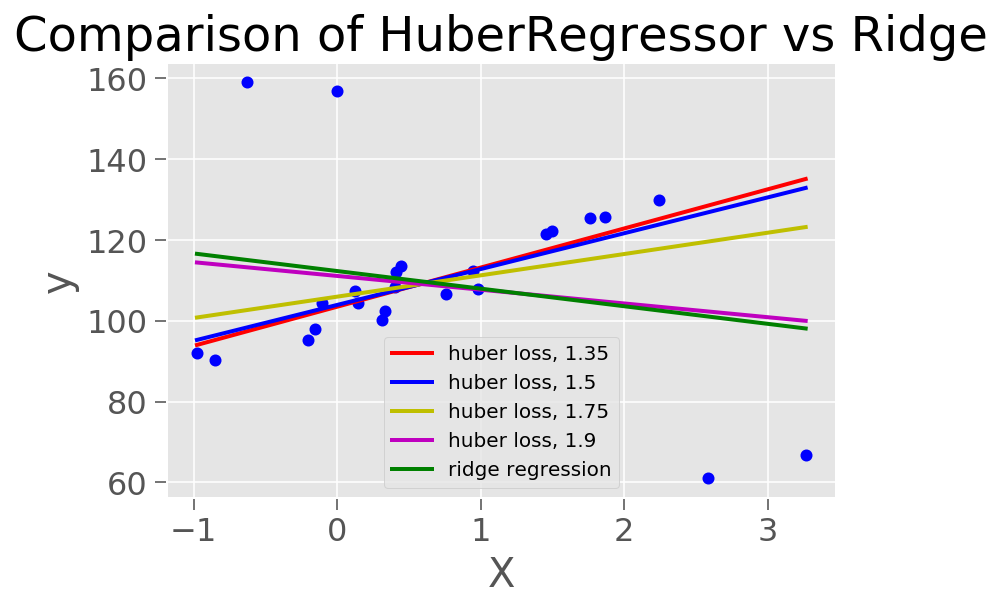

In [6]:
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor, Ridge

# Generate toy data.
rng = np.random.RandomState(0)
X, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4.0,
                       bias=100.0)

# Add four strong outliers to the dataset.
X_outliers = rng.normal(0, 0.5, size=(4, 1))
y_outliers = rng.normal(0, 2.0, size=4)
X_outliers[:2, :] += X.max() + X.mean() / 4.
X_outliers[2:, :] += X.min() - X.mean() / 4.
y_outliers[:2] += y.min() - y.mean() / 4.
y_outliers[2:] += y.max() + y.mean() / 4.
X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))
plt.plot(X, y, 'b.')

# Fit the huber regressor over a series of epsilon values.
colors = ['r-', 'b-', 'y-', 'm-']

x = np.linspace(X.min(), X.max(), 7)
epsilon_values = [1.35, 1.5, 1.75, 1.9]
for k, epsilon in enumerate(epsilon_values):
    huber = HuberRegressor(fit_intercept=True, alpha=0.0, max_iter=100,
                           epsilon=epsilon)
    huber.fit(X, y)
    coef_ = huber.coef_ * x + huber.intercept_
    plt.plot(x, coef_, colors[k], label="huber loss, %s" % epsilon)

# Fit a ridge regressor to compare it to huber regressor.
ridge = Ridge(fit_intercept=True, alpha=0.0, random_state=0, normalize=True)
ridge.fit(X, y)
coef_ridge = ridge.coef_
coef_ = ridge.coef_ * x + ridge.intercept_
plt.plot(x, coef_, 'g-', label="ridge regression")

plt.title("Comparison of HuberRegressor vs Ridge")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc=0)
plt.show()

## Cross-validation

Analogous to the classification problem, one can also do cross-validation during regression to determine the best hyperparameters. For example, choosing the regularization parameter for ridge or lasso regression, or choosing the polynomial degree of a polynomial fit.

![](images/05-Polynomial.png)

![](images/05-PolynomialCV.png)